# Number of Fundings

2015 936
2016 993
2017 443


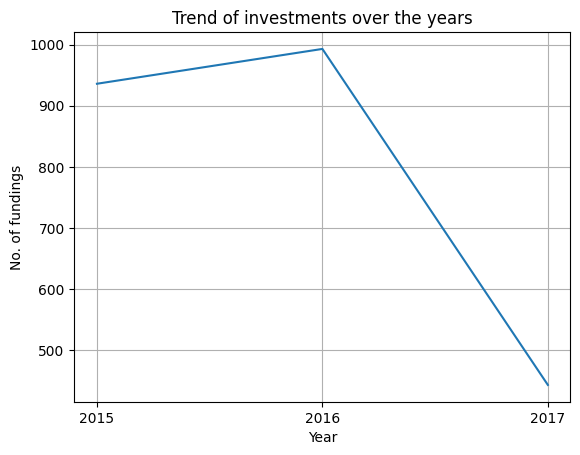

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
%matplotlib inline
data = pd.read_csv("startup_funding.csv")
year = data["Date"].str[-4:]
year.value_counts()
year = year.to_dict()
year_dict={}
for years in year.values():
    if years in year_dict:
        year_dict[years] += 1
    else:
        year_dict[years] = 1
for i in sorted(year_dict.keys()):
    print(i, year_dict[i])
year_dict = collections.OrderedDict(sorted(year_dict.items()))

plt.plot(year_dict.keys(), year_dict.values())
plt.title('Trend of investments over the years')
plt.xlabel('Year')
plt.ylabel('No. of fundings')
plt.grid()
plt.show()

# Top Indian Cities

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


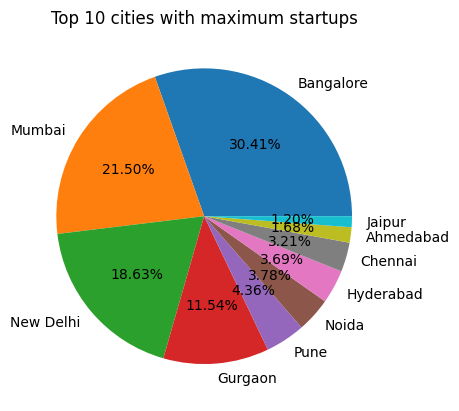

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
data = data.dropna(subset=['CityLocation'])
def separateCity(city): 
    return city.split('/')[0].strip() 
data.CityLocation=data.CityLocation.apply(separateCity)
data[data.CityLocation == "bangalore"] = "Bangalore"
data[data.CityLocation == "Delhi"] = "New Delhi"
City = data.CityLocation
City = City.value_counts()[:10]
index = City.index
values = City.values
for i in range(10):
    print(index[i], values[i])   
plt.pie(values, labels = index, autopct='%.2f%%')
plt.title("Top 10 cities with maximum startups")
plt.show()

# Funding amount

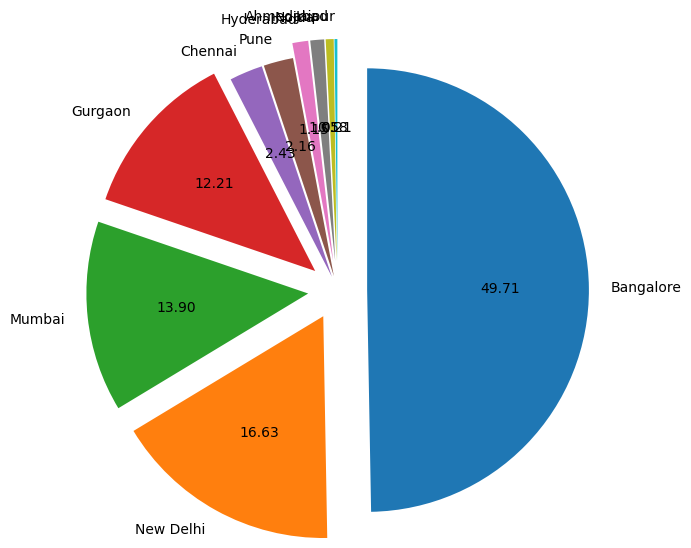

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


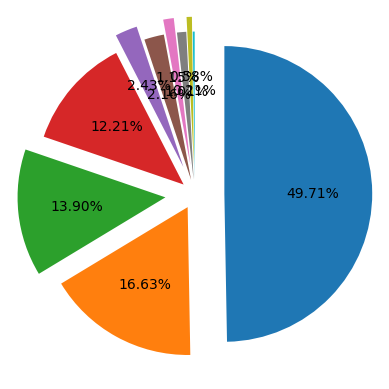

In [65]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv",)
data = data.dropna(subset=['CityLocation'])
def separateCity(city) :
    return city.split('/')[0].strip()
data.CityLocation = data.CityLocation.apply(separateCity)
data.CityLocation.replace("Delhi", "New Delhi", inplace = True)
data.CityLocation.replace("bangalore", "Bangalore", inplace = True)
data.AmountInUSD = data.AmountInUSD.apply(lambda x: float(str(x).replace(",", "")))
data = data.groupby('CityLocation')['AmountInUSD'].sum()
data = data.sort_values(ascending=False)[:10:]
indices = data.index
values = data.values
percent = np.true_divide(values, values.sum())*100
for i in range(len(indices)):
    print(indices[i], format(percent[i], '0.2f'))
explode = [0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1]
plt.pie(percent, startangle=90, counterclock=False, explode = explode, autopct='%0.2f%%')
plt.show()

# Investment Type


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


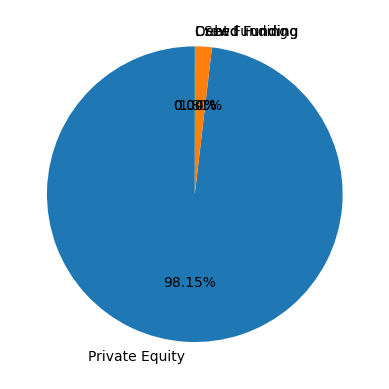

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
data.InvestmentType.replace("PrivateEquity", "Private Equity", inplace = True)
data.InvestmentType.replace("Crowd funding", "Crowd Funding", inplace = True)
data.InvestmentType.replace("SeedFunding", "Seed Funding", inplace = True)
data.AmountInUSD = data.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
data = data.groupby('InvestmentType')['AmountInUSD'].sum()
data = data.sort_values(ascending=False)
index = data.index
amounts = data.values
percent = np.true_divide(amounts, amounts.sum())*100
for i in range(len(index)):
    print(index[i], format(percent[i], '0.2f'))
plt.pie(amounts, startangle=90, autopct='%0.2f%%', labels = index)
plt.show()


# Top Industries

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


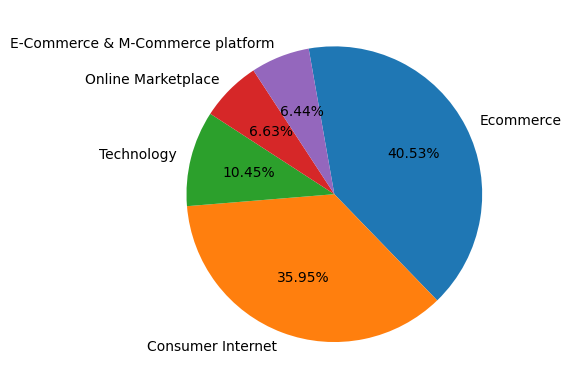

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
data.IndustryVertical.replace('eCommerce', 'Ecommerce', inplace = True)
data.IndustryVertical.replace('ecommerce', 'Ecommerce', inplace = True)
data.IndustryVertical.replace('ECommerce', 'Ecommerce', inplace = True)
data.AmountInUSD = data.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
data = data.groupby('IndustryVertical')['AmountInUSD'].sum()
data = data.sort_values(ascending=False)[:5]
index = data.index
amounts = data.values
percent = np.true_divide(amounts, amounts.sum())*100
for i in range(len(index)):
    print(index[i], format(percent[i],'0.2f'))
plt.pie(amounts, startangle=100, labels = index, counterclock=False, autopct='%0.2f%%')
plt.show()
# data.IndustryVertical.value_counts()

# Top Startups

In [72]:
import numpy as np
import pandas as pd
data = pd.read_csv("startup_funding.csv")

data.StartupName.replace("Oyorooms","Oyo", inplace = True)
data.StartupName.replace("Oyo Rooms","Oyo", inplace = True)
data.StartupName.replace("OYO Rooms","Oyo", inplace = True)
data.StartupName.replace("OyoRooms","Oyo", inplace = True)
data.StartupName.replace("Ola Cabs","Ola", inplace = True)
data.StartupName.replace("Olacabs","Ola", inplace = True)
data.StartupName.replace("Flipkart.com","Flipkart", inplace = True)
data.StartupName.replace("Paytm Marketplace","Paytm", inplace = True)

data.AmountInUSD = data.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
data.AmountInUSD
data = data.groupby('StartupName')['AmountInUSD'].sum()
data = data.sort_values(ascending= False)[:5]
index = data.index
for i in range(len(index)):
    print(index[i])
# data.StartupName.value_counts()

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Funding rounds

In [78]:
import numpy as np
import pandas as pd
data = pd.read_csv("startup_funding.csv")

data.StartupName.replace("Oyorooms","Oyo", inplace = True)
data.StartupName.replace("Oyo Rooms","Oyo", inplace = True)
data.StartupName.replace("OYO Rooms","Oyo", inplace = True)
data.StartupName.replace("OyoRooms","Oyo", inplace = True)
data.StartupName.replace("Ola Cabs","Ola", inplace = True)
data.StartupName.replace("Olacabs","Ola", inplace = True)
data.StartupName.replace("Flipkart.com","Flipkart", inplace = True)
data.StartupName.replace("Paytm Marketplace","Paytm", inplace = True)
top5 = data.StartupName.value_counts()[:5]
for i in range(5):
    print(top5.index[i], top5.values[i])


Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# Top Investor

In [113]:
import csv
import numpy as np
with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        # if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
        for i in row['InvestorsName'].split(','):
            investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])

Sequoia Capital 64


In [117]:
import csv
import numpy as np
with open('startup_funding.csv', encoding = "UTF-8") as file_obj:
    data = csv.DictReader(file_obj, skipinitialspace = True)
    investors=[]
    for row in data:
        for i in row['InvestorsName'].split(','):
            investors.append(i.strip())
    dic={}
    for i in investors :
        if i in dic:
            dic[i] += 1
        else:
            dic[i] = 1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x = np.array(x)
    np_y = np.array(y)
    np_x = np_x[np.argsort(np_y)]
    np_y = np.sort(np_y)
    np_x = np_x[::-1]
    np_y = np_y[::-1]
    print(np_x[0], np_y[0])

Sequoia Capital 64
